# Working with numpy Matrices (Multidimensional Data)

* Student Name: Michael Rideout
* Student Number: 225065259
* E-mail: s225065259@deakin.edu.au
* Student Course Code: SIT731
---

## Introduction

This report will explore the capabilities of matrices in the python numpy [1] library utilising the Prof.Marek's Data for Teaching [2] slimmed down dataset of the National health and Nutrition Examination Survey (NHANES) body measurements for adult men and women. 

In [1]:
# Imports section
import os # library for interacting with the file system
import numpy as np # library for matrix operations
from urllib.request import urlretrieve # library to download files
import matplotlib.pyplot as plt # library for plotting
import scipy.stats as stats # library for statistics
from prettytable import PrettyTable # library for tables
import seaborn as sns # library for plots

## Numpy Matrices

Download the NHANES body measurement csv files for both male and femalle. Only download from Github if the files dont exist already on the filesystem.

In [2]:
###
# Question 1 Implementation - Download github datasets
###

download_base_url = 'https://github.com/gagolews/teaching-data/blob/master/marek/'
male_data_file = 'nhanes_adult_male_bmx_2020.csv'
female_data_file = 'nhanes_adult_female_bmx_2020.csv'

# Download the files if they don't exist on the file system already
if not os.path.exists(male_data_file):
    urlretrieve(download_base_url + male_data_file + '?raw=true', male_data_file)
if not os.path.exists(female_data_file):
    urlretrieve(download_base_url  + female_data_file + '?raw=true', female_data_file)

Now that we have the datasets, perform sanity checks on the row and column sizes by loading them into a matrix and making assertions
The datasets contain the following columns

|Column|Feature Name|Description    |
|------|------------|---------------|
|1     |BMXWT       |weight (kg)    |
|2     |BMXHT       |height (cm)    |
|3     |BMXARML     |arm length (cm)|
|4     |BMXLEG      |leg length (cm)|
|5     |BMXARMC     |arm circumference (cm)|
|6     |BMXHIP      |hip circumference (cm)|
|7     |BMXWAIST    |waist circumference (cm)|


In [3]:
###
# Question 2 Implementation - Load data into numpy matrices
###
male_data = np.genfromtxt(male_data_file, delimiter=',', skip_header=19)
female_data = np.genfromtxt(female_data_file, delimiter=',', skip_header=19)

# check we have 7 columns in each dataset, and 4081 rows for males and 4221 rows for females
assert (male_data.shape[0] == 4081)
assert (male_data.shape[1] == 7)
assert (female_data.shape[0] == 4221)
assert (female_data.shape[1] == 7)


We have successfully loaded the datasets and performed matrix shape sanity checks.

BMI (Body Mass Index) is a value derived from the weight and height of a person [3]. The formlua is as follows:
$$ BMI = \frac{weight}{height^2} $$
where weight is in kilograms and height is in meters

Calculate the BMI for the male and female datasets and append the result as the last column to the matrices.

In [4]:
# Funciton to calculate BMI
def calculate_bmi(weight, height):
    """
    Calculate BMI from height and weight
    weight is in kg
    height is in cm   
    """
    return weight / (height/100)**2

Now that we have defined a function to calculate bmi, apply the function to every row in the matrix, then add the bmi values as the eight column to both male and female datasets

In [5]:
###
# Question 3 Implementation - Calculate BMI and add as a new column
###

# calculate the bmis
male_bmi = calculate_bmi(male_data[:, 0], male_data[:, 1])
female_bmi = calculate_bmi(female_data[:, 0], female_data[:, 1])

# spot check the first two values of the bmis
assert (round(male_bmi[0], 2) == 29.73)
assert (round(female_bmi[0], 2) == 37.84)    

# add the bmis as a new column
male_data = np.insert(male_data, 7, male_bmi, axis=1)
female_data = np.insert(female_data, 7, female_bmi, axis=1)

# assert that we now have 8 columns
assert (male_data.shape[1] == 8)
assert (female_data.shape[1] == 8)  


Both the male and female matricies now have the eight column being the BMI value. 

Below is the plot of the new BMI values for both datasets

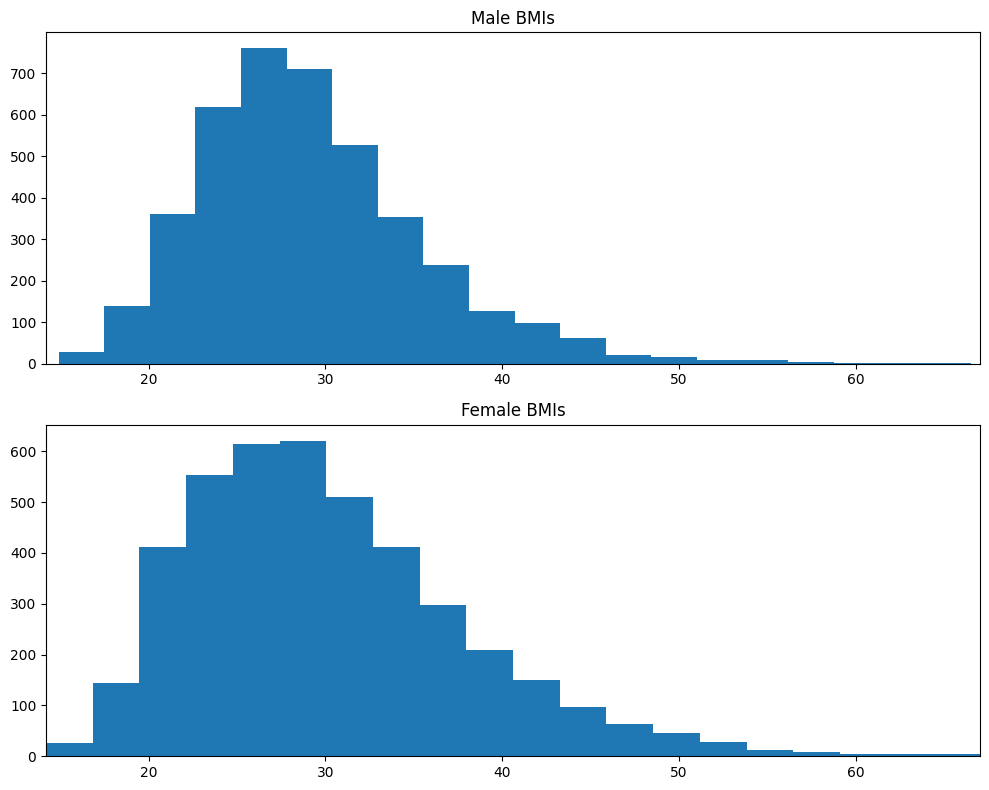

In [6]:
###
# Question 4 Implementation - Plot both female and male BMI distributions
###


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Calculate the overall min and max BMI values
min_bmi = min(male_data[:, 7].min(), female_data[:, 7].min())
max_bmi = max(male_data[:, 7].max(), female_data[:, 7].max())

ax1.hist(male_data[:, 7], bins=20)
ax1.set_title('Male BMIs')
ax1.set_xlim(min_bmi, max_bmi)

ax2.hist(female_data[:, 7], bins=20)
ax2.set_title('Female BMIs')
ax2.set_xlim(min_bmi, max_bmi)

plt.tight_layout()
plt.show()

We can observe from these histogram plots that both are right skewed i.e. the distribution doesnt have a normal bell curved shaped as indicated by more values occuring and tapering off to the right than the left.

We can also observe that for females the tail to the right is thicker than it is for men indicating a higher frequency of increase BMI levels

Another useful tool for visualisation of datasets is the boxplot. It readily displays the dispersion and outliers contained in a dataset

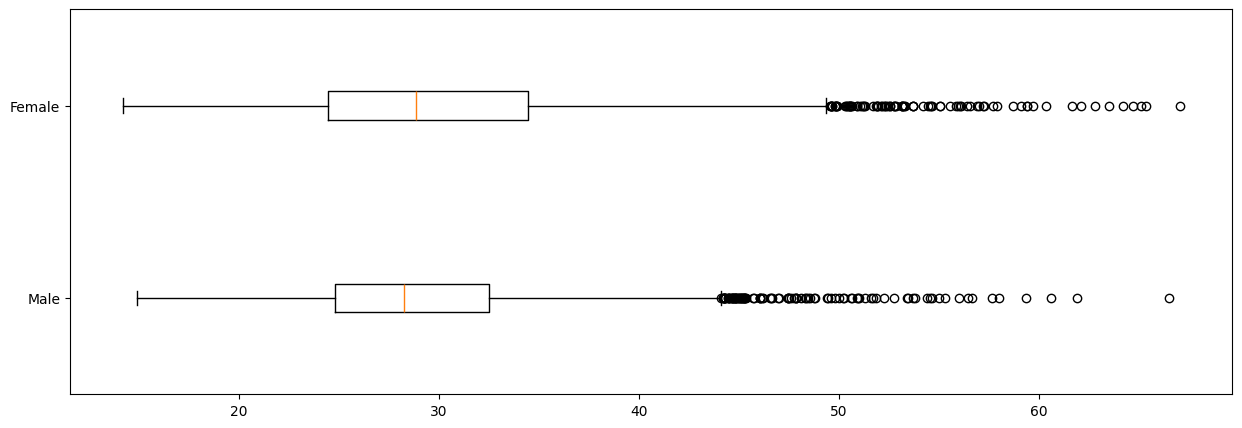

In [7]:
###
# Question 5 Implementation - Boxplots of BMI by gender
###

ax = plt.figure(figsize=(15, 5))

plt.boxplot([male_data[:, 7], female_data[:, 7]], tick_labels=['Male', 'Female'], vert=False)

plt.show()

This boxplot further confirms the right skewdenss of the data as the boxplot isnt symmetric but stretched to the right. There are also quite a few outliers for both the male and female datasets to the right of the maximum whisker (but not to the left of the minimum whisker).

Basic stastistical descriptors will provide further details about the two datasets

In [8]:
###
# Question 6 Implementation - Statistical descriptors
###

def calculate_stats(data):
    """
    Calculate basic statistical descriptors for a dataset
    input: data - numpy array
    """
    dict = {}
    dict['mean'] = f"{round(np.mean(data), 2):.2f}"
    dict['std'] = f"{round(np.std(data), 2):.2f}"
    dict['min'] = f"{round(np.min(data), 2):.2f}"
    dict['max'] = f"{round(np.max(data), 2):.2f}"
    dict['skew'] = f"{round(stats.skew(data), 2):.2f}"
    dict['median'] = f"{round(np.median(data), 2):.2f}"
    dict['iqr'] = f"{round(np.quantile(data, 0.75) - np.quantile(data, 0.25), 2):.2f}"
    return dict

male_stats = calculate_stats(male_data[:, 7])
female_stats = calculate_stats(female_data[:, 7])

table = PrettyTable()

table.field_names = ['Statistic', 'Female', 'Male']
table.add_row(['Mean', female_stats['mean'], male_stats['mean']])
table.add_row(['Standard Deviation', female_stats['std'], male_stats['std']])
table.add_row(['Min', female_stats['min'], male_stats['min']])
table.add_row(['Max', female_stats['max'], male_stats['max']])
table.add_row(['Skew', female_stats['skew'], male_stats['skew']])
table.add_row(['Median', female_stats['median'], male_stats['median']])
table.add_row(['Interquartile Range', female_stats['iqr'], male_stats['iqr']])

print(table)

+---------------------+--------+-------+
|      Statistic      | Female |  Male |
+---------------------+--------+-------+
|         Mean        | 30.10  | 29.14 |
|  Standard Deviation |  7.76  |  6.31 |
|         Min         | 14.20  | 14.91 |
|         Max         | 67.04  | 66.50 |
|         Skew        |  0.92  |  0.97 |
|        Median       | 28.89  | 28.27 |
| Interquartile Range | 10.01  |  7.73 |
+---------------------+--------+-------+


## Comment on Statistical Descriptors (Question 6)

From the above statisical insights we can derive the following conclusions about the datasets:
* The means (Female: 30.10, Male 29.14) and medians (Female 28.89, Male 28.27) are not too dissimilar indicating that the central tendency for both datasets is similar.
* The female dataset has a higher standard deviation (7.76) when compare to the male dataset (6.31) and the interquartile range is also larger (Female 10.01, Male 7.73) which means that the female dataset is more dispersed.
* Both datasets are positively skewed (Female 0,92, Male 0.97) which indicates the datasets are right-skewed.
* Both datasets have a substantial number of outliers to the right of the maximum whisker.
* Both datasets have a similar shape and central tendency but the female dataset shows slightly more variablity and has a larger spread compared to the male dataset.

Now inspect the some of the features of the male dataset and how they are related to one another. The features we will inspect are:
* Height
* Weight
* Waist
* Hip
* BMI

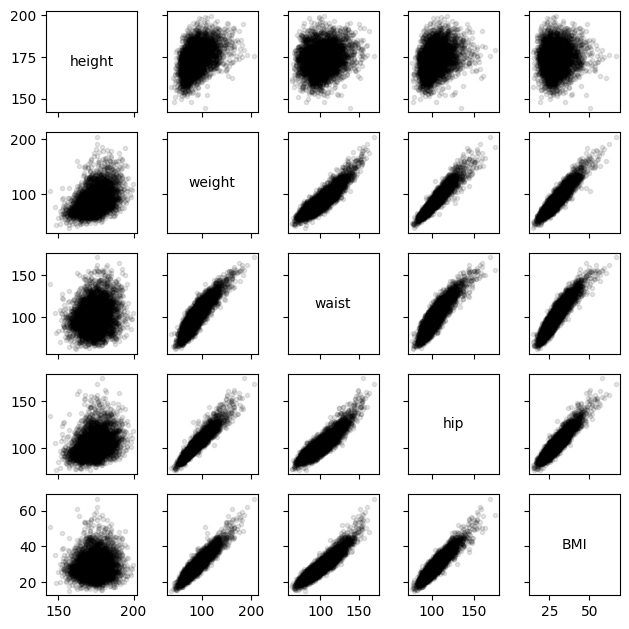

In [9]:
###
# Question 8 Implementation - Scatterplot
###

# Define column indices for features
weight_idx = 0
height_idx = 1
hip_idx = 5
waist_idx = 6
bmi_idx = 7

# Create the feature matrix by specifying the column indices and then the order of the columns
male_data_feature_matrix = male_data[:, [weight_idx, height_idx, hip_idx, waist_idx, bmi_idx]][:, [1, 0, 3, 2, 4]]

# Produce a scatter plot of the feature matrix using the pairplot function
feature_labels = ['height', 'weight', 'waist', 'hip', 'BMI']

def generate_scatterplot(feature_matrix, feature_labels):
    """
    Generate scatterplot
    input: feature_matrix - numpy matrix
    input: feature_labels - the feature labels list
    """

    feature_count = feature_matrix.shape[1]

    # Create the pairplot based on the code by Marek Gagolewski [4].
    fig, axes = plt.subplots(nrows=feature_count, ncols=feature_count, sharex="col", sharey="row", figsize=(plt.rcParams["figure.figsize"][0], )*2)

    for i in range(feature_count):
        for j in range(feature_count):
            ax = axes[i, j]
            if i == j:
                # add diagonal text
                ax.text(0.5, 0.5, feature_labels[i], va="center", ha="center", transform=ax.transAxes)
            else:
                # add the plot
                ax.plot(feature_matrix[:, j], feature_matrix[:, i], '.', color="black", alpha=0.1)

    plt.tight_layout()
    plt.show()

generate_scatterplot(male_data_feature_matrix, feature_labels)

From this scatterplot we can surmise the following:
* Weight has a linear relationship to waist, hip and BMI
* Waist has a linear relationship to weight, hip and BMI
* Hip has a linear relationship to weight, waist and BMI
* BMI has a linear relationship to weight, waist and hip

Futher explore the male feature pair matrix by creating a Pearson's and Spearman's correlation heatmap.

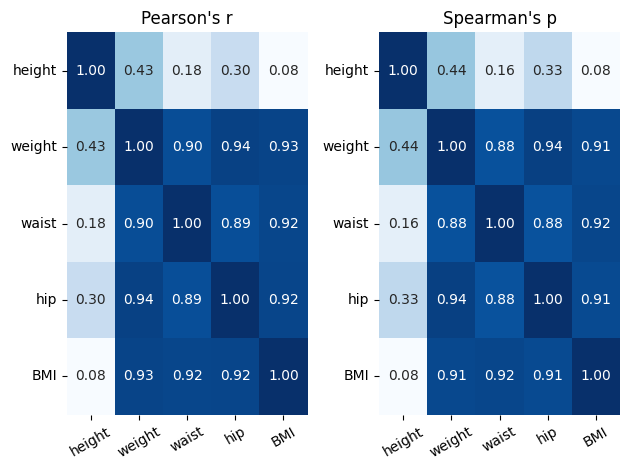

In [10]:
###
# Question 9 Implementation - Correlation heatmaps
###

def generate_correlation_heatmaps(feature_matrix, feature_labels):
    """
    Generate correlation heatmaps
    input: data - numpy matrix
    input: feature_labels - the feature labels list
    """

    # Define first plot
    plt.subplot(1, 2, 1)
    # Calculate the pearsons correlation matrix
    pearson_matrix = np.corrcoef(feature_matrix, rowvar=False)    

    # Create the Pearson correlation heatmap
    sns.heatmap(pearson_matrix,
                xticklabels=feature_labels,
                yticklabels=feature_labels,
                annot=True,
                cmap='Blues', fmt=".2f",
                cbar=False).set(title="Pearson's r")

    # Set ticks rotation
    plt.yticks(rotation=0)
    plt.xticks(rotation=30)

    # define second plot
    plt.subplot(1, 2, 2)

    # Calculate the pearsons correlation matrix
    spearman_matrix, _ = stats.spearmanr(feature_matrix)

    # Create the Spearman correlation heatmap
    sns.heatmap(spearman_matrix,
                xticklabels=feature_labels,
                yticklabels=feature_labels,
                annot=True,
                cmap='Blues', fmt=".2f",
                cbar=False).set(title="Spearman's p")

    # Set ticks rotation
    plt.yticks(rotation=0)
    plt.xticks(rotation=30)


    # show the plot
    plt.tight_layout()
    plt.show()


generate_correlation_heatmaps(male_data_feature_matrix, feature_labels)

## Comment on Scatterplots and Correlation Heatmaps (Question 10)

From both the Pearson's correlation coefficient heat map the following can be observed:
* Weight, waist, hip and BMIs features are all highlighly correlated with one another and that all of the Pearsons coefficients for these feature pairs are greater or equal to 0.89 and less that or equal to 0.94.
* Height is not correlated to BMI or waist measurements.
* Height is only slightly correlated to hip and weight measurements.

This correlation between feature pairs can also be observed in the scatterplots are there is clearly a linear relationship between the features pairs of weight, waist, hip and BMI. A linear relationship is observed when the scatterplot between two features shows a distinct diagonal line in the plotted data (rising to the right for positively correlated data). Height when compared to all the other features does not display this type of plot (data is plotted as more of a cloud) and therefore height does not have a linear relationship with any of the other features.

Generate a matrix of feature pairs for the male dataset but this time compute the zscore for each feature pair

In [11]:
###
# Question 11 Implementation - Z-score version of male dataset
###

# calculate the z-scores
zmale = stats.zscore(male_data_feature_matrix)


Perform the same scatterplot and correlation heatmap plots as before but this time using the zscore feature value matrix

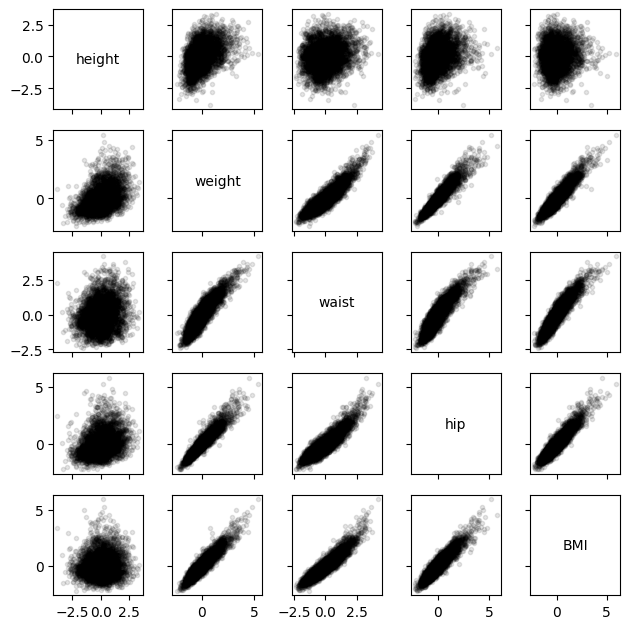

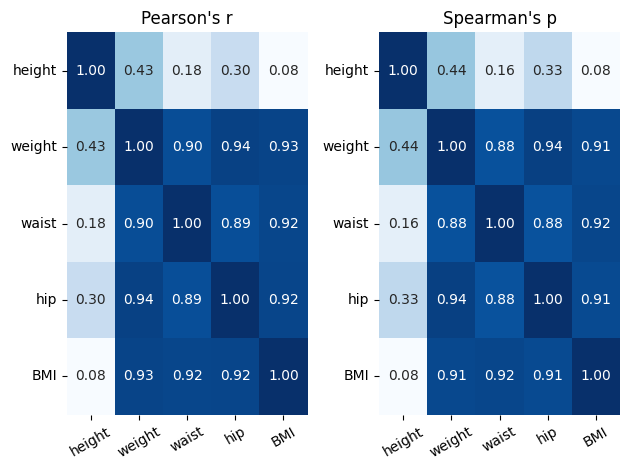

In [12]:
###
# Question 12 Implementation - Scatterplot and correlation heatmaps of z-scores
###

generate_scatterplot(zmale, feature_labels)
generate_correlation_heatmaps(zmale, feature_labels)


It can be sceen from the zscore scatterplot and the non-zscore scatterplot that the feature pair plots are identical but with one difference. The x and y axis have different scales on the zscore scatterplot due to zscore scaling the range of the features to have a mean of zero. Most features have a scale of plus or minus 3 but for some of the features the range can extend slightly beyond this. 

The Pearson and Spearman correlation coefficient heatmaps return the exact same plots for both the zscore version and the non-zscore version of the male feature pair matricies.

## Conclusion

This report has explored the use of numpy matricies and how such matrices can store tabular datasets. Topics explored were the loading of datasets from CSV files into numpy matricies, distribution and statistical descriptor analysis, production of parwise scatterplots of the features in a matrix, generation of Pearson and Spearman correlation coefficient heatmaps and investigations into the effect on zscore transformation of data has on such plots.

## Reference

1. Harris, C.R. et al., 2020. Array programming with NumPy. Nature, 585, pp.357–362.
2. Prof. Marek's Data for Teaching, Retrieved 16:01, November 22, 2024, from https://github.com/gagolews/teaching-data/tree/master/marek
3. Wikipedia contributors. (2024, November 17). Body mass index. In Wikipedia, The Free Encyclopedia. Retrieved 09:34, November 22, 2024, from https://en.wikipedia.org/w/index.php?title=Body_mass_index&oldid=1257891480
4. Gagolewski, Marek, Minimalist Data Wrangling in Python, section 7.4.3, Retrieved 11:20, November 25, 2024 from https://datawranglingpy.gagolewski.com/chapter/310-matrix.html#